# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559700 sha256=87752729f03d661075198f300e121ba646933ca7f01fbcb72ad9c014a778d45d
  Stored in directory: c:\users\owner\appdata\local\pip\cache\wheels\6d\df\5e\ad8eb9cc5ee7f4ba76865167c09f9a7edff405c669111d8353
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # add the delay to avoid blowing out the API Key
        time.sleep(2)

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print(f"{city} not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tilichiki
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | praya
Processing Record 4 of Set 1 | antofagasta
Processing Record 5 of Set 1 | severodvinsk
Processing Record 6 of Set 1 | komsomolets
Processing Record 7 of Set 1 | nabire
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | paamiut
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | dipkarpaz
City not found. Skipping...
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | mount gambier
Processing Record 15 of Set 1 | kankon
Processing Record 16 of Set 1 | calvinia
Processing Record 17 of Set 1 | caravelas
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | barrow
Processing Record 22 of

Processing Record 36 of Set 4 | padang
Processing Record 37 of Set 4 | zhigansk
Processing Record 38 of Set 4 | vila
Processing Record 39 of Set 4 | lisala
Processing Record 40 of Set 4 | gerash
Processing Record 41 of Set 4 | ahipara
Processing Record 42 of Set 4 | bilma
Processing Record 43 of Set 4 | falealupo
City not found. Skipping...
Processing Record 44 of Set 4 | maraa
Processing Record 45 of Set 4 | kruisfontein
Processing Record 46 of Set 4 | cidreira
Processing Record 47 of Set 4 | carnarvon
Processing Record 48 of Set 4 | humberto de campos
Processing Record 49 of Set 4 | port macquarie
Processing Record 0 of Set 5 | pevek
Processing Record 1 of Set 5 | port keats
Processing Record 2 of Set 5 | coari
Processing Record 3 of Set 5 | henties bay
Processing Record 4 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 5 of Set 5 | airai
Processing Record 6 of Set 5 | hihifo
City not found. Skipping...
Processing Record 7 of Set 5 | punta alta
Processing Record 

Processing Record 22 of Set 8 | kidal
Processing Record 23 of Set 8 | zanjan
Processing Record 24 of Set 8 | half moon bay
Processing Record 25 of Set 8 | angoche
Processing Record 26 of Set 8 | baruun-urt
Processing Record 27 of Set 8 | najran
Processing Record 28 of Set 8 | cockburn harbour
City not found. Skipping...
Processing Record 29 of Set 8 | lebanon
Processing Record 30 of Set 8 | anadyr
Processing Record 31 of Set 8 | maceio
Processing Record 32 of Set 8 | red bank
Processing Record 33 of Set 8 | tahta
Processing Record 34 of Set 8 | flin flon
Processing Record 35 of Set 8 | khonuu
City not found. Skipping...
Processing Record 36 of Set 8 | belogorsk
Processing Record 37 of Set 8 | sfantu gheorghe
Processing Record 38 of Set 8 | atikokan
Processing Record 39 of Set 8 | anchorage
Processing Record 40 of Set 8 | udachnyy
Processing Record 41 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 42 of Set 8 | awjilah
Processing Record 43 of Set 8 | clyde river
Pro

Processing Record 11 of Set 12 | sribne
Processing Record 12 of Set 12 | cam pha
City not found. Skipping...
Processing Record 13 of Set 12 | lovozero
Processing Record 14 of Set 12 | pedasi
Processing Record 15 of Set 12 | skagastrond
City not found. Skipping...
Processing Record 16 of Set 12 | beira
Processing Record 17 of Set 12 | nyurba
Processing Record 18 of Set 12 | mlandizi
Processing Record 19 of Set 12 | salina
Processing Record 20 of Set 12 | lorengau
Processing Record 21 of Set 12 | tigil
Processing Record 22 of Set 12 | banjarmasin
Processing Record 23 of Set 12 | ibipeba
Processing Record 24 of Set 12 | xianshuigu
Processing Record 25 of Set 12 | jackson
Processing Record 26 of Set 12 | mae chan
Processing Record 27 of Set 12 | medzev
Processing Record 28 of Set 12 | brae
Processing Record 29 of Set 12 | simao
Processing Record 30 of Set 12 | korla
Processing Record 31 of Set 12 | aporawan
City not found. Skipping...
Processing Record 32 of Set 12 | nassau
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city_data_pd = pd.DataFrame(city_data)
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tilichiki,60.4667,166.1000,12.09,86,99,8.39,RU,1635033059
1,punta arenas,-53.1500,-70.9167,35.71,87,90,27.63,CL,1635033061
2,praya,14.9215,-23.5087,77.54,78,0,12.66,CV,1635033064
3,antofagasta,-23.6500,-70.4000,60.08,77,6,7.76,CL,1635033066
4,severodvinsk,64.5635,39.8302,24.91,83,100,4.94,RU,1635033068


In [8]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,5.780000e+02
mean,19.758251,17.969961,58.930433,72.956747,56.397924,7.300657,1.635034e+09
std,33.694254,90.530650,20.928932,18.796544,37.638536,5.227509,4.194520e+02
min,-54.800000,-179.166700,-6.970000,12.000000,0.000000,0.000000,1.635033e+09
25%,-9.856700,-59.464950,43.817500,63.000000,20.000000,3.425000,1.635033e+09
50%,22.733450,21.090300,61.860000,77.000000,62.500000,5.950000,1.635034e+09
75%,48.084600,100.214700,77.062500,86.000000,94.000000,10.015000,1.635034e+09
max,78.218600,179.316700,94.080000,100.000000,100.000000,27.630000,1.635034e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.
dirty_city_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index
                                  
dirty_city_data

Int64Index([], dtype='int64')

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_pd.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tilichiki,60.4667,166.1000,12.09,86,99,8.39,RU,1635033059
1,punta arenas,-53.1500,-70.9167,35.71,87,90,27.63,CL,1635033061
2,praya,14.9215,-23.5087,77.54,78,0,12.66,CV,1635033064
3,antofagasta,-23.6500,-70.4000,60.08,77,6,7.76,CL,1635033066
4,severodvinsk,64.5635,39.8302,24.91,83,100,4.94,RU,1635033068


In [13]:
# Extract relevant fields from the data frame
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

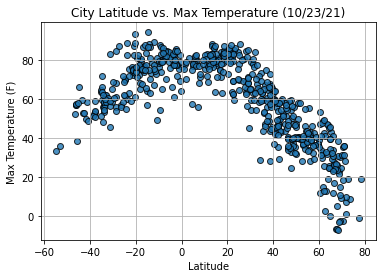

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

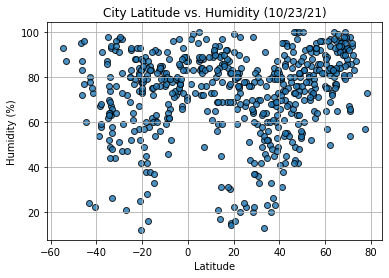

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

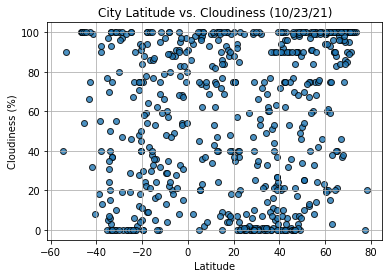

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


## Latitude vs. Wind Speed Plot

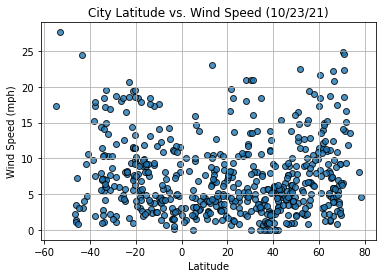

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Linear Regression

In [18]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7757674621294608


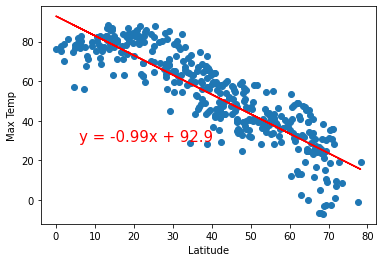

In [20]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5121617745488173


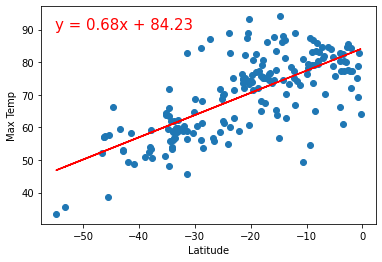

In [21]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.045393572354383425


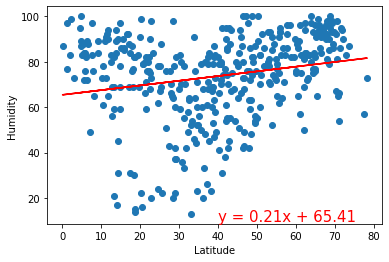

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.007010855034035041


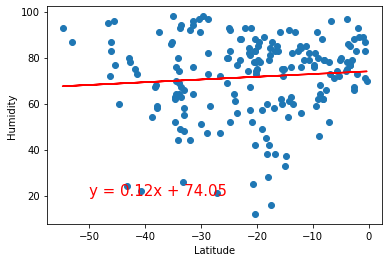

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.04854485669068797


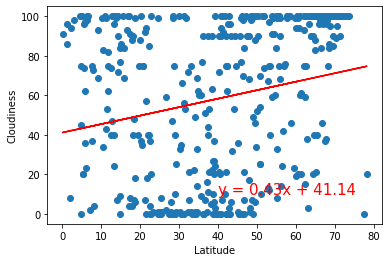

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.001292784930481933


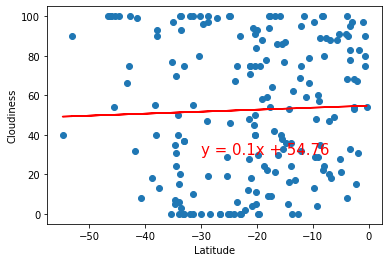

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0518210273049295


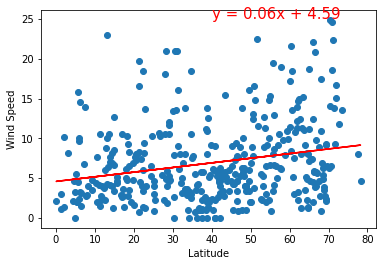

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.03379799571133803


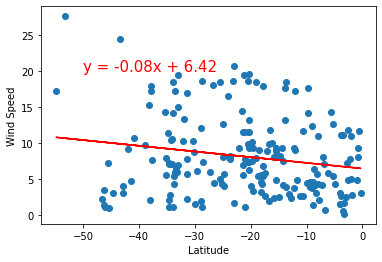

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))